In [500]:
# %pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [501]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [502]:
# make sure we avoid OOM
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### Remove dodgy images

In [503]:
import cv2
import imghdr

In [504]:
data_dir = 'images'

In [505]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [506]:
count = 0
for image_class in os.listdir(data_dir): 
    if image_class == '.DS_Store':
        continue
    # print(image_class)

    for image in os.listdir(os.path.join(data_dir, image_class)):
        # print(image)
        count += 1

print(count)

803


In [507]:
img = cv2.imread(os.path.join('images', 'truck2','745.jpg'))
img.shape # colored image

(2250, 3000, 3)

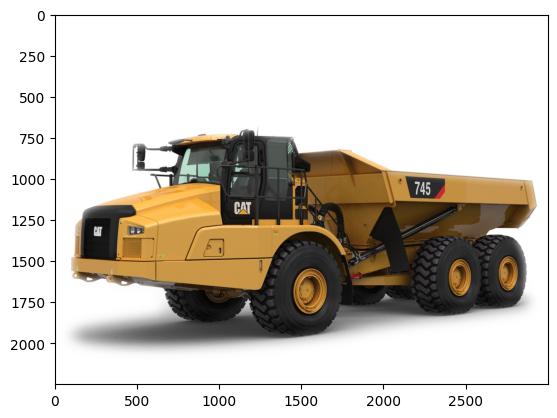

In [508]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [509]:
# all the files in the image file
for image_class in os.listdir(data_dir): 
    print(image_class)

    # we don't need .DS_Store

planer
excavator
.DS_Store
drill rigs
compactors
truck2
dozers
draglines
asphalt_paver


In [510]:
# cleansed
for image_class in os.listdir(data_dir): 
    if image_class == '.DS_Store':
        continue
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


### Load Data

In [511]:
import numpy as np
from matplotlib import pyplot as plt

In [512]:
data = tf.keras.utils.image_dataset_from_directory('images')

Found 803 files belonging to 8 classes.


In [513]:
data_iterator = data.as_numpy_iterator()

In [514]:
# batch of data
batch = data_iterator.next()

2023-07-20 16:34:03.758689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [515]:
# images represented as numpy arrays
# [0] is image [1] is label
batch[0].shape

(32, 256, 256, 3)

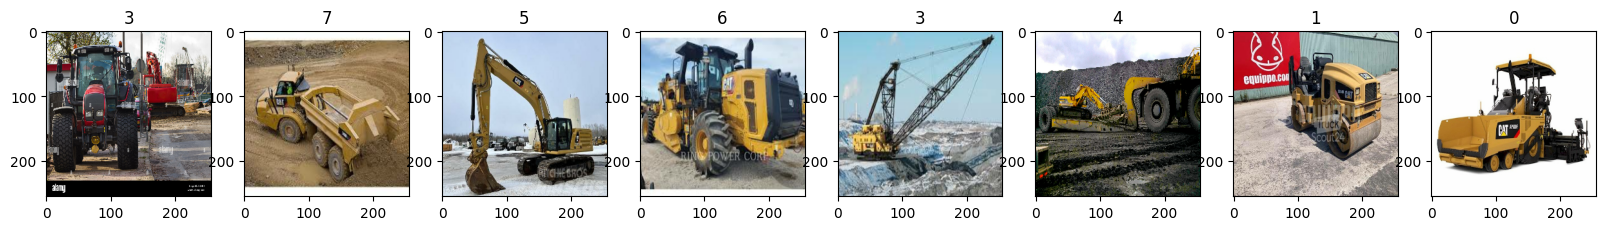

In [516]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [517]:
scaled = batch[0]/255
scaled.max()

1.0

### Preprocess Data

In [518]:
data = tf.keras.utils.image_dataset_from_directory('images')
# x is image
# y is label
data = data.map(lambda x,y: (x/255, y))

# 0 to 1
data.as_numpy_iterator().next()

Found 803 files belonging to 8 classes.


2023-07-20 16:34:05.371883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[3.40441167e-01, 3.20833325e-01, 2.97303915e-01],
          [3.40441167e-01, 3.20833325e-01, 2.97303915e-01],
          [3.20833325e-01, 3.01225483e-01, 2.77696073e-01],
          ...,
          [5.26960790e-01, 4.36764717e-01, 3.74019593e-01],
          [5.37622571e-01, 4.47426468e-01, 3.84681374e-01],
          [5.37622571e-01, 4.47426468e-01, 3.84681374e-01]],
 
         [[3.52941185e-01, 3.33333343e-01, 3.09803933e-01],
          [3.52941185e-01, 3.33333343e-01, 3.09803933e-01],
          [3.43995094e-01, 3.24387252e-01, 3.00857842e-01],
          ...,
          [4.72794116e-01, 3.82598042e-01, 3.19852948e-01],
          [5.22671580e-01, 4.32475477e-01, 3.69730383e-01],
          [5.22671580e-01, 4.32475477e-01, 3.69730383e-01]],
 
         [[3.37009817e-01, 3.17401975e-01, 2.93872535e-01],
          [3.37009817e-01, 3.17401975e-01, 2.93872535e-01],
          [3.37009817e-01, 3.17401975e-01, 2.93872535e-01],
          ...,
          [4.94362742e-01, 4.04166669e-01, 3.4142

#### Split data

In [519]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) 

In [520]:
train_size

18

In [521]:
val_size

6

In [522]:
test_size

2

In [523]:
len(data)

26

In [524]:
# assignment to partitions
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Build deep learning model

In [525]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [526]:
# sequential class
model = Sequential()

In [527]:
# first layer 16 filter, shape 3 by 3, stride of 1
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) # convolution

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))
# model.add(Dense(1, activation='sigmoid'))

In [528]:
# optimizer is adam in this case


# changed it to sparsecategoricalcrossentropy
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [529]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 30, 30, 16)      

#### Training model

In [530]:
logdir = 'logs'

In [531]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [532]:
# epoch is how many we are traning
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-07-20 16:34:06.355003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 16s - loss: 2.0868 - accuracy: 0.0938

2023-07-20 16:34:06.858152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 2.0704 - accuracy: 0.1667

2023-07-20 16:34:10.186340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:34:10.634990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 288ms/step - loss: 2.0704 - accuracy: 0.1667 - val_loss: 2.0457 - val_accuracy: 0.2188
Epoch 2/20


2023-07-20 16:34:12.099011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 2.0613 - accuracy: 0.1562

2023-07-20 16:34:12.586914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 2.0348 - accuracy: 0.1858

2023-07-20 16:34:15.851551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:34:16.300039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 286ms/step - loss: 2.0348 - accuracy: 0.1858 - val_loss: 2.0091 - val_accuracy: 0.1979
Epoch 3/20


2023-07-20 16:34:17.750368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 1.9844 - accuracy: 0.3125

2023-07-20 16:34:18.235841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 1.9443 - accuracy: 0.2604

2023-07-20 16:34:21.551581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:34:22.002886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 289ms/step - loss: 1.9443 - accuracy: 0.2604 - val_loss: 1.8561 - val_accuracy: 0.3281
Epoch 4/20


2023-07-20 16:34:23.473927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 1.7516 - accuracy: 0.3750

2023-07-20 16:34:23.995271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 1.7219 - accuracy: 0.3889

2023-07-20 16:34:27.299165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:34:27.749019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 292ms/step - loss: 1.7219 - accuracy: 0.3889 - val_loss: 1.6189 - val_accuracy: 0.4010
Epoch 5/20


2023-07-20 16:34:29.224443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 1.5528 - accuracy: 0.4062

2023-07-20 16:34:29.728162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 1.4585 - accuracy: 0.4670

2023-07-20 16:34:32.966271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:34:33.422603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 287ms/step - loss: 1.4585 - accuracy: 0.4670 - val_loss: 1.3059 - val_accuracy: 0.5938
Epoch 6/20


2023-07-20 16:34:34.898830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 1.3610 - accuracy: 0.5938

2023-07-20 16:34:35.381722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 1.1461 - accuracy: 0.6233

2023-07-20 16:34:38.654096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:34:39.101971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 286ms/step - loss: 1.1461 - accuracy: 0.6233 - val_loss: 1.3026 - val_accuracy: 0.5625
Epoch 7/20


2023-07-20 16:34:40.552943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 1.1584 - accuracy: 0.6875

2023-07-20 16:34:41.023622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.9124 - accuracy: 0.7101

2023-07-20 16:34:44.354951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:34:44.814818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 291ms/step - loss: 0.9124 - accuracy: 0.7101 - val_loss: 0.8721 - val_accuracy: 0.7188
Epoch 8/20


2023-07-20 16:34:46.284372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 0.5523 - accuracy: 0.8125

2023-07-20 16:34:46.769286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.7020 - accuracy: 0.7778

2023-07-20 16:34:50.085796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:34:50.530482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 290ms/step - loss: 0.7020 - accuracy: 0.7778 - val_loss: 0.8875 - val_accuracy: 0.7500
Epoch 9/20


2023-07-20 16:34:52.001215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 0.5674 - accuracy: 0.8125

2023-07-20 16:34:52.511489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.4377 - accuracy: 0.8802

2023-07-20 16:34:55.822498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:34:56.280868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 292ms/step - loss: 0.4377 - accuracy: 0.8802 - val_loss: 0.5108 - val_accuracy: 0.8542
Epoch 10/20


2023-07-20 16:34:57.745182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 0.2223 - accuracy: 0.9688

2023-07-20 16:34:58.252581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.2832 - accuracy: 0.9288

2023-07-20 16:35:01.633957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:35:02.089401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 296ms/step - loss: 0.2832 - accuracy: 0.9288 - val_loss: 0.4781 - val_accuracy: 0.8750
Epoch 11/20


2023-07-20 16:35:03.569686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 0.3172 - accuracy: 0.8750

2023-07-20 16:35:04.069244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.1757 - accuracy: 0.9479

2023-07-20 16:35:07.407331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:35:07.865634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 293ms/step - loss: 0.1757 - accuracy: 0.9479 - val_loss: 0.3683 - val_accuracy: 0.9323
Epoch 12/20


2023-07-20 16:35:09.349988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 0.0275 - accuracy: 1.0000

2023-07-20 16:35:09.830075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.1071 - accuracy: 0.9688

2023-07-20 16:35:13.151182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:35:13.612240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 293ms/step - loss: 0.1071 - accuracy: 0.9688 - val_loss: 0.2137 - val_accuracy: 0.9583
Epoch 13/20


2023-07-20 16:35:15.125151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/18 [==>...........................] - ETA: 4s - loss: 0.1059 - accuracy: 0.9844 

2023-07-20 16:35:15.641407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.0856 - accuracy: 0.9826

2023-07-20 16:35:19.014410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:35:19.464182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 296ms/step - loss: 0.0856 - accuracy: 0.9826 - val_loss: 0.1775 - val_accuracy: 0.9635
Epoch 14/20


2023-07-20 16:35:20.942568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 0.0237 - accuracy: 1.0000

2023-07-20 16:35:21.433031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.0583 - accuracy: 0.9896

2023-07-20 16:35:24.766204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:35:25.227974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 292ms/step - loss: 0.0583 - accuracy: 0.9896 - val_loss: 0.2199 - val_accuracy: 0.9427
Epoch 15/20


2023-07-20 16:35:26.718463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/18 [==>...........................] - ETA: 3s - loss: 0.0440 - accuracy: 0.9844 

2023-07-20 16:35:27.206502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.0478 - accuracy: 0.9878

2023-07-20 16:35:30.515365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:35:30.975028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 290ms/step - loss: 0.0478 - accuracy: 0.9878 - val_loss: 0.0938 - val_accuracy: 0.9688
Epoch 16/20


2023-07-20 16:35:32.460726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 0.0177 - accuracy: 1.0000

2023-07-20 16:35:32.953949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.0610 - accuracy: 0.9844

2023-07-20 16:35:36.360630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:35:36.807486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 295ms/step - loss: 0.0610 - accuracy: 0.9844 - val_loss: 0.0897 - val_accuracy: 0.9688
Epoch 17/20


2023-07-20 16:35:38.275114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 0.1049 - accuracy: 0.9375

2023-07-20 16:35:38.784523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.0600 - accuracy: 0.9826

2023-07-20 16:35:42.180971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:35:42.640243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 299ms/step - loss: 0.0600 - accuracy: 0.9826 - val_loss: 0.1203 - val_accuracy: 0.9531
Epoch 18/20


2023-07-20 16:35:44.155999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/18 [==>...........................] - ETA: 3s - loss: 0.1119 - accuracy: 0.9375 

2023-07-20 16:35:44.644612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.0877 - accuracy: 0.9722

2023-07-20 16:35:47.987177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:35:48.441282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 292ms/step - loss: 0.0877 - accuracy: 0.9722 - val_loss: 0.0663 - val_accuracy: 0.9896
Epoch 19/20


2023-07-20 16:35:49.911105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 0.0101 - accuracy: 1.0000

2023-07-20 16:35:50.420162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.0628 - accuracy: 0.9809

2023-07-20 16:35:53.733083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:35:54.184262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 292ms/step - loss: 0.0628 - accuracy: 0.9809 - val_loss: 0.0792 - val_accuracy: 0.9792
Epoch 20/20


2023-07-20 16:35:55.668686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/18 [>.............................] - ETA: 13s - loss: 0.0061 - accuracy: 1.0000

2023-07-20 16:35:56.177113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - ETA: 0s - loss: 0.0540 - accuracy: 0.9896

2023-07-20 16:35:59.557799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:36:00.017832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/18 [==============================] - 6s 297ms/step - loss: 0.0540 - accuracy: 0.9896 - val_loss: 0.1064 - val_accuracy: 0.9792


In [533]:
hist.history

{'loss': [2.070432186126709,
  2.034846067428589,
  1.9442945718765259,
  1.7219215631484985,
  1.4585373401641846,
  1.146131992340088,
  0.9124158024787903,
  0.7019940614700317,
  0.4376693665981293,
  0.2831740379333496,
  0.17573444545269012,
  0.10710786283016205,
  0.08557810634374619,
  0.05834193900227547,
  0.04781119525432587,
  0.06102784350514412,
  0.060005273669958115,
  0.08765442669391632,
  0.06277785450220108,
  0.053954463452100754],
 'accuracy': [0.1666666716337204,
  0.1857638955116272,
  0.2604166567325592,
  0.3888888955116272,
  0.4670138955116272,
  0.6232638955116272,
  0.7100694179534912,
  0.7777777910232544,
  0.8802083134651184,
  0.9288194179534912,
  0.9479166865348816,
  0.96875,
  0.9826388955116272,
  0.9895833134651184,
  0.9878472089767456,
  0.984375,
  0.9826388955116272,
  0.9722222089767456,
  0.9809027910232544,
  0.9895833134651184],
 'val_loss': [2.0456583499908447,
  2.009061336517334,
  1.856080412864685,
  1.6189279556274414,
  1.30586016

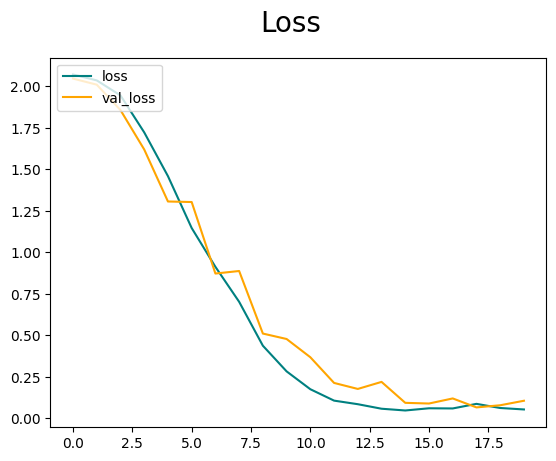

In [534]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

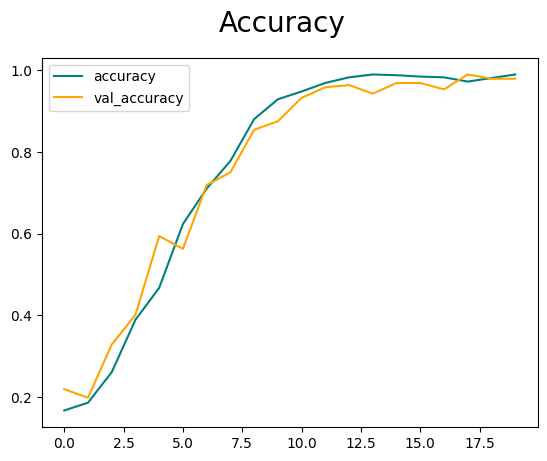

In [535]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluating performance

In [536]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [537]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [538]:
print(test)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [539]:
# print(train_size)
# print(val_size)
# print(test_size)
# print(len(data))

print(len(test))
print(len(train))
print(len(val))

2
18
6


In [540]:
for batch in train.as_numpy_iterator(): 
    X, y = batch
    # print(X.shape)
    # print(y.shape)
    print(y)

2023-07-20 16:36:01.713730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


[0 5 3 3 0 6 2 5 7 5 0 3 3 6 7 2 0 6 7 6 3 0 5 2 1 0 6 4 5 3 0 2]
[0 2 6 2 5 6 6 1 1 6 2 0 6 4 6 6 6 2 7 3 6 6 4 0 0 0 2 0 7 0 6 6]


2023-07-20 16:36:02.165287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


[0 6 2 1 2 1 3 4 6 1 6 2 0 1 6 1 6 4 0 0 5 7 0 0 4 7 2 5 3 6 2 1]
[0 6 3 0 3 6 0 6 6 6 2 0 5 4 1 5 4 5 2 6 7 2 2 0 7 0 7 7 7 6 7 3]
[7 7 6 1 7 3 0 4 0 0 5 5 6 1 6 7 3 7 5 4 6 4 2 5 4 4 6 0 1 5 7 0]
[6 6 1 0 2 1 5 0 6 7 1 7 6 5 1 0 5 3 5 0 6 7 6 6 6 3 4 1 0 1 4 6]
[5 7 2 6 4 0 0 7 6 0 0 1 6 0 7 5 4 0 1 5 4 6 7 4 5 7 6 3 4 0 6 3]
[3 0 1 6 0 6 5 5 0 2 6 3 0 2 6 7 3 0 6 5 3 5 4 1 6 6 7 6 6 2 7 1]
[6 1 1 3 4 7 1 5 6 0 0 7 7 7 3 3 5 4 0 7 6 6 5 3 3 1 7 3 0 7 4 1]
[4 2 3 6 3 0 4 0 4 5 5 6 6 7 0 0 0 6 1 6 6 4 3 2 7 5 2 3 0 6 7 6]
[7 6 4 3 2 7 4 1 5 2 0 6 7 6 7 2 3 2 2 1 0 5 3 3 7 7 0 0 7 3 6 3]
[0 4 6 0 1 0 7 3 5 6 7 7 2 4 6 3 0 1 5 1 2 2 3 4 0 0 2 3 0 0 4 4]
[4 1 1 0 0 4 7 0 2 6 5 5 7 0 5 6 1 1 7 6 6 1 3 5 0 3 7 5 6 1 4 7]
[3 0 3 2 2 4 6 4 6 2 3 5 5 5 0 5 0 1 4 3 2 2 7 4 3 4 7 0 0 5 2 3]
[5 1 6 4 0 0 6 6 4 6 4 0 5 1 2 7 5 7 0 3 0 7 5 5 2 6 0 2 0 7 7 5]
[5 4 0 7 6 4 6 3 6 6 0 0 5 0 6 7 0 6 5 3 0 6 3 5 6 7 1 4 7 2 5 1]
[7 0 5 3 5 4 6 5 2 5 6 4 1 1 5 5 0 6 5 4 0 7 2 4 0 5 6 0 3 0 7 4]
[0 4 7 3 7

In [541]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pred = np.argmax(yhat, axis = 1)
    pre.update_state(y, pred)
    re.update_state(y, pred)
    acc.update_state(y, pred)

2023-07-20 16:36:03.417244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-20 16:36:03.876643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 38ms/step


In [542]:
print(f'Presision: {pre.result().numpy()}, Recall: {re.result()}, Accuracy:{acc.result()}')

Presision: 0.9666666388511658, Recall: 1.0, Accuracy:0.2571428716182709


#### Testing

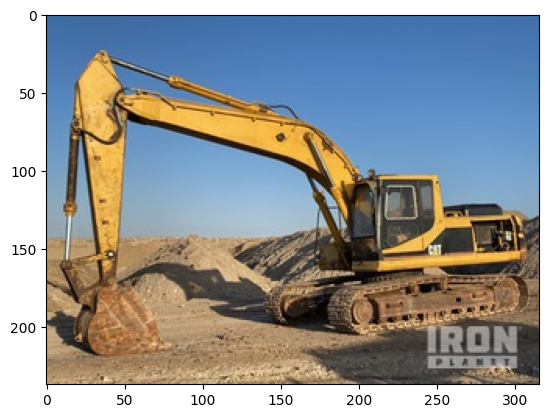

In [543]:
img = cv2.imread('excavator_test.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

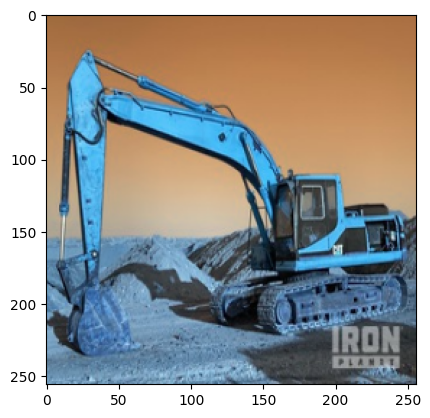

In [544]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [545]:
np.expand_dims(resize, 0)

array([[[[160.      , 108.      ,  62.      ],
         [159.64844 , 107.64844 ,  61.648438],
         [159.      , 107.      ,  61.      ],
         ...,
         [170.      , 111.      ,  66.      ],
         [170.      , 111.      ,  66.      ],
         [170.      , 111.      ,  66.      ]],

        [[160.      , 108.      ,  62.      ],
         [159.64844 , 107.64844 ,  61.648438],
         [159.      , 107.      ,  61.      ],
         ...,
         [170.      , 111.      ,  66.      ],
         [170.      , 111.      ,  66.      ],
         [170.      , 111.      ,  66.      ]],

        [[160.      , 108.      ,  62.      ],
         [159.93477 , 107.93477 ,  61.93477 ],
         [159.81445 , 107.81445 ,  61.814453],
         ...,
         [170.      , 111.      ,  66.      ],
         [170.      , 111.      ,  66.      ],
         [170.      , 111.      ,  66.      ]],

        ...,

        [[125.32555 , 166.32555 , 198.32555 ],
         [122.78586 , 163.78586 , 195.78586 ]

In [546]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 14ms/step


array([[7.6750093e-06, 9.9419092e-05, 5.5430205e-06, 9.5900899e-04,
        9.4846827e-01, 3.3178627e-02, 1.2194175e-02, 5.0872192e-03]],
      dtype=float32)

In [547]:
pred = np.argmax(yhat, axis = 1)
pred

array([4])

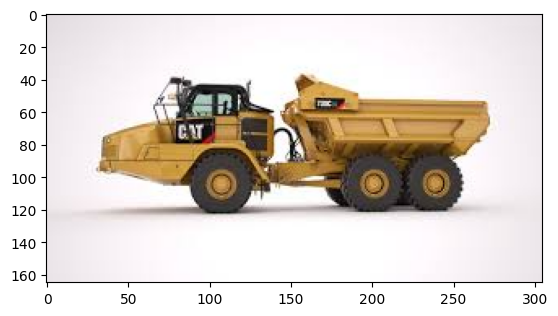

In [548]:
img2 = cv2.imread('truck2test.jpeg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

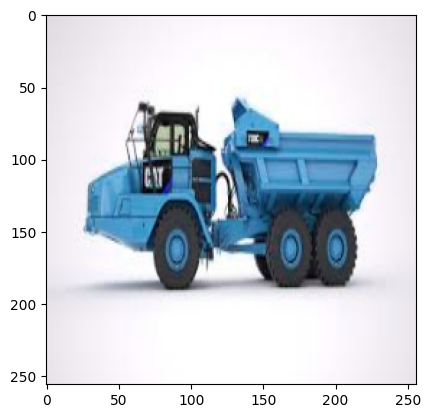

In [549]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [550]:
np.expand_dims(resize2, 0)
yhat2 = model.predict(np.expand_dims(resize2/255, 0))
yhat2

1/1 [==============================] - 0s 14ms/step


array([[2.4262561e-06, 2.6554543e-01, 6.2074967e-08, 2.7581350e-06,
        3.3097385e-05, 1.8743678e-03, 7.0665047e-02, 6.6187674e-01]],
      dtype=float32)

In [551]:
pred2 = np.argmax(yhat2, axis = 1)
pred2

array([7])

In [552]:
# if yhat > 0.5: 
#     print(f'Predicted class is excavator')
# else:
#     print(f'Predicted class is truck')

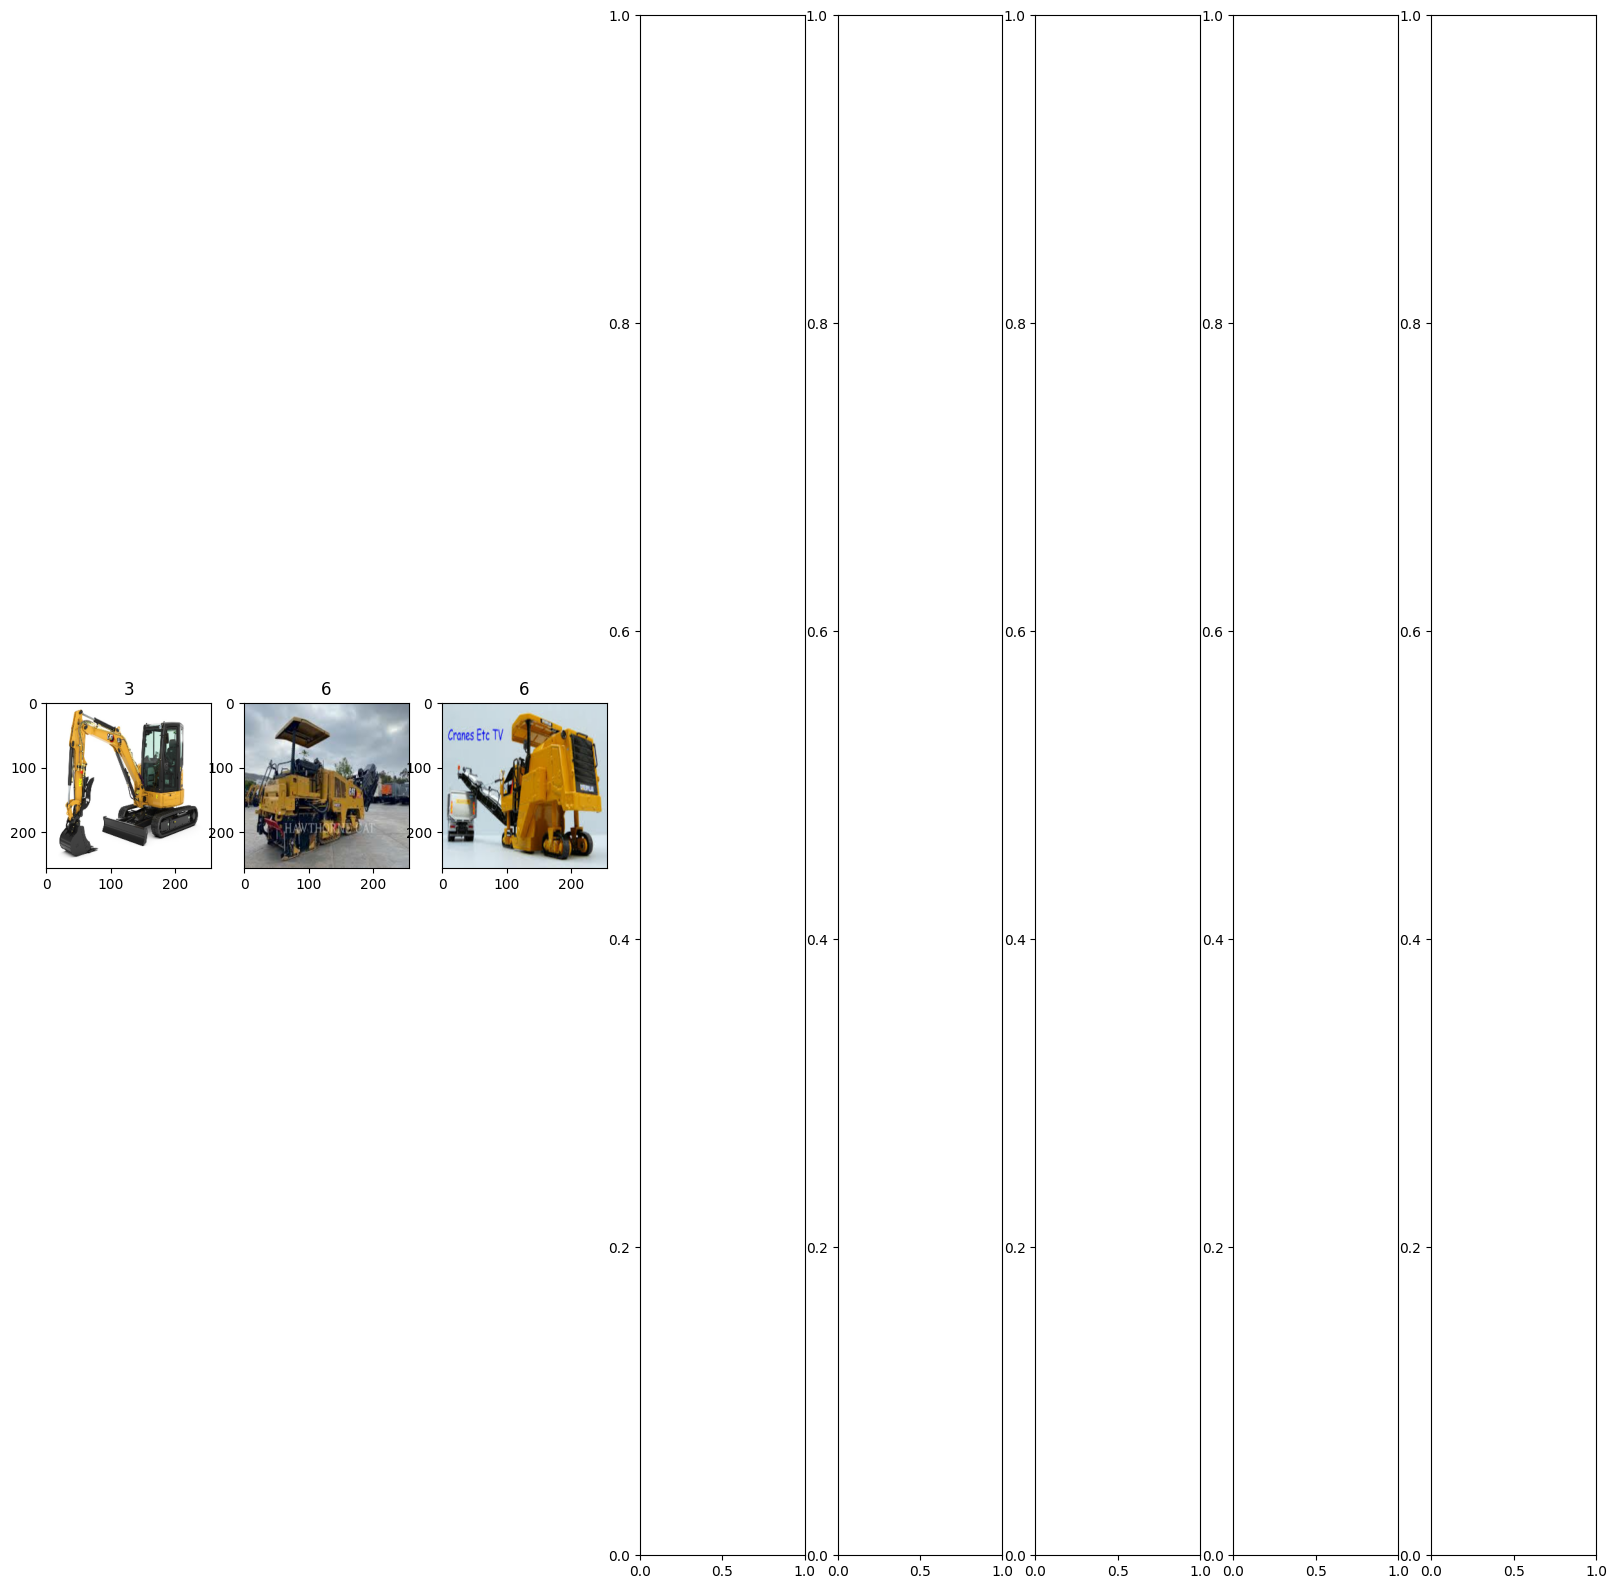

In [553]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

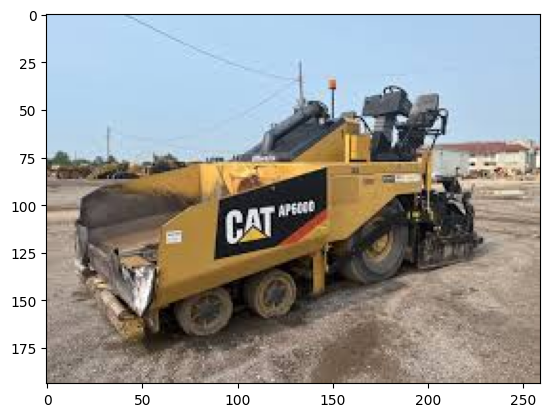

In [554]:
img3 = cv2.imread('asphalt_test.jpeg')
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
plt.show()

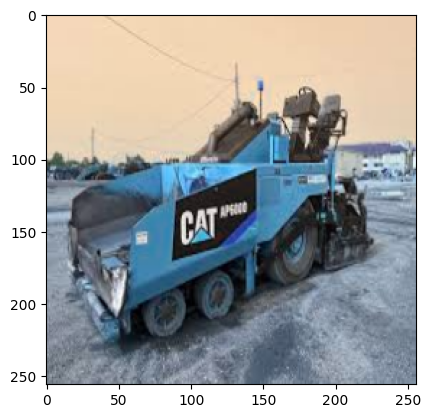

In [555]:
resize3 = tf.image.resize(img3, (256,256))
plt.imshow(resize3.numpy().astype(int))
plt.show()

In [556]:
np.expand_dims(resize3, 0)
yhat3 = model.predict(np.expand_dims(resize3/255, 0))
yhat3

1/1 [==============================] - 0s 13ms/step


array([[7.60176897e-01, 9.46997851e-03, 1.59804884e-04, 6.24273016e-05,
        6.90311342e-02, 1.24189354e-01, 1.40178599e-03, 3.55086401e-02]],
      dtype=float32)

In [557]:
pred3 = np.argmax(yhat3, axis = 1)
pred3

array([0])

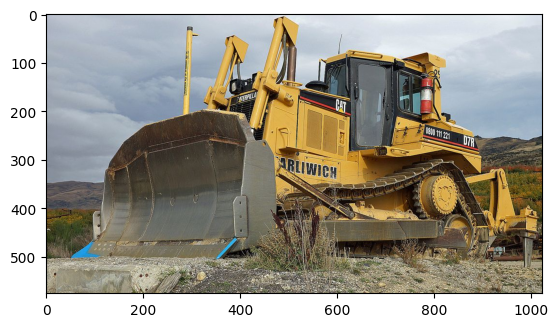

In [558]:
img4 = cv2.imread('dozer_test.jpeg')
plt.imshow(cv2.cvtColor(img4,cv2.COLOR_BGR2RGB))
plt.show()

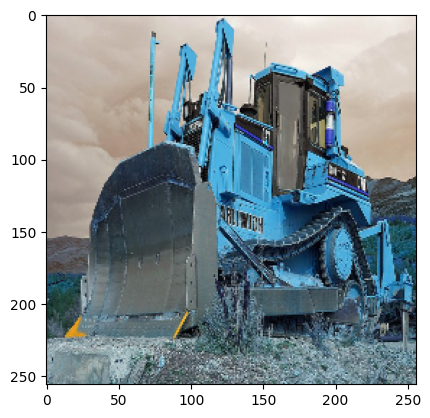

In [559]:
resize4 = tf.image.resize(img4, (256,256))
plt.imshow(resize4.numpy().astype(int))
plt.show()

In [560]:
np.expand_dims(resize4, 0)
yhat4 = model.predict(np.expand_dims(resize4/255, 0))
yhat4

1/1 [==============================] - 0s 13ms/step


array([[5.2242266e-04, 4.6367691e-07, 9.9762720e-01, 1.6283913e-04,
        6.7430860e-06, 1.5628502e-03, 1.4559073e-06, 1.1602359e-04]],
      dtype=float32)

In [561]:
pred4 = np.argmax(yhat4, axis = 1)
pred4

array([2])

### Save the model

In [562]:
from tensorflow.keras.models import load_model

In [563]:
model.save(os.path.join('models','cathackmodel_v1.h5'))

In [564]:
new_model = load_model(os.path.join('models', 'cathackmodel_v1.h5'))

In [565]:
new_model

In [566]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


array([[7.6750093e-06, 9.9419092e-05, 5.5430205e-06, 9.5900899e-04,
        9.4846827e-01, 3.3178627e-02, 1.2194175e-02, 5.0872192e-03]],
      dtype=float32)